In [3]:
import gymnasium as gym  # <-- Important!
import os
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import DQN
from gymnasium.wrappers import RecordEpisodeStatistics
from stable_baselines3.common.monitor import Monitor
# Log directory
log_dir = "./logs/"
os.makedirs(log_dir, exist_ok=True)


env = gym.make("LunarLander-v3")
env = Monitor(env, log_dir)  # This logs training episode rewards and lengths


# Initialize DQN agent
model = DQN(
    "MlpPolicy",
    env,
    buffer_size=100000,
    learning_starts=10000,
    batch_size=128,
    exploration_fraction=0.2,
    target_update_interval=1000,
    policy_kwargs=dict(net_arch=[256, 256]),
    verbose=1,
)
model.learn(total_timesteps=500_000)

# Save model
model.save("dqn_lunarlander_vt")

Using cpu device
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 81.8     |
|    ep_rew_mean      | -111     |
|    exploration_rate | 0.997    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 3962     |
|    time_elapsed     | 0        |
|    total_timesteps  | 327      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 91.4     |
|    ep_rew_mean      | -126     |
|    exploration_rate | 0.993    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 4808     |
|    time_elapsed     | 0        |
|    total_timesteps  | 731      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 95.8     |
|    ep_rew_mean      | -163     |
|    exploration_rate | 0.989    |
| t

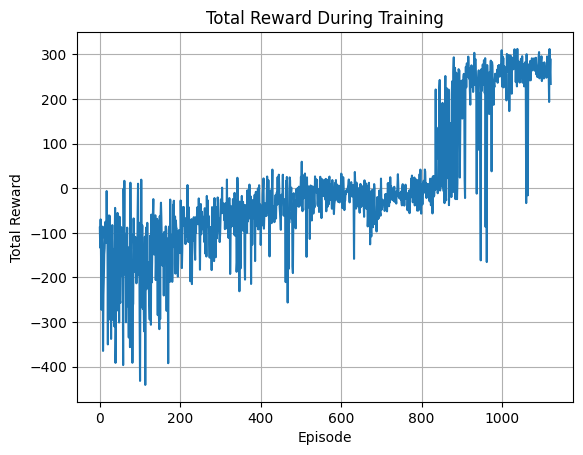

In [4]:
import pandas as pd

monitor_file = os.path.join(log_dir, "monitor.csv")
df = pd.read_csv(monitor_file, skiprows=1)  # First row is a comment

# Plot reward over episodes
plt.plot(df["r"])  # 'r' is total reward
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Reward During Training")
plt.grid(True)
plt.show()


In [6]:
import time


# Load environment with rendering
env = gym.make("LunarLander-v3", render_mode="human")

# Load trained model
model = DQN.load("dqn_lunarlander_vt", env=env)

obs, _ = env.reset()  # <-- FIXED: unpack obs and info
done = False

while not done:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)  # New Gym returns 5 items
    if done or truncated:
        obs, _ = env.reset()
    time.sleep(0.02)

env.close()


Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


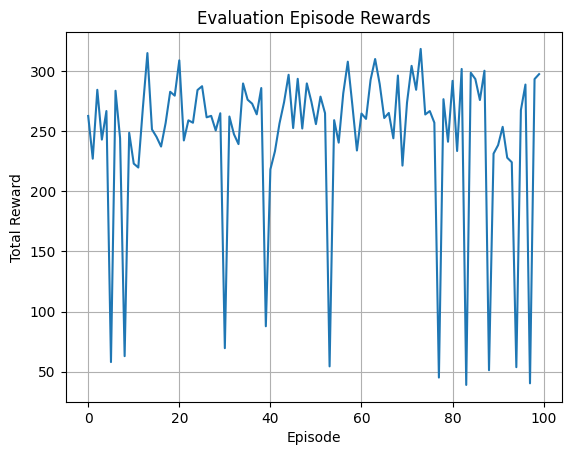

In [35]:
import matplotlib.pyplot as plt


# Create evaluation env with RecordEpisodeStatistics
eval_env = RecordEpisodeStatistics(gym.make("LunarLander-v3"))

# Load trained model
model = DQN.load("dqn_lunarlander_vt", env=eval_env)

episode_rewards = []
n_eval_episodes = 100  # or more, depending on how detailed you want the plot

for _ in range(n_eval_episodes):
    obs, info = eval_env.reset()
    done, truncated = False, False
    total_reward = 0
    while not (done or truncated):
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, truncated, info = eval_env.step(action)
        total_reward += reward
    episode_rewards.append(total_reward)

# Plotting
import matplotlib.pyplot as plt

plt.plot(episode_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Evaluation Episode Rewards")
plt.grid(True)
plt.show()



